In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import os
# from prepare_data import prepare_input

In [2]:
max_iter =10000
size = 40


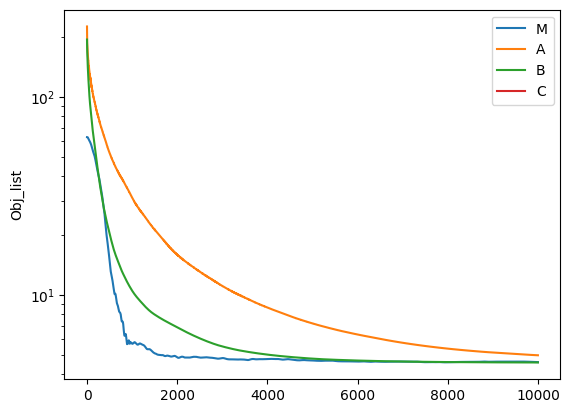

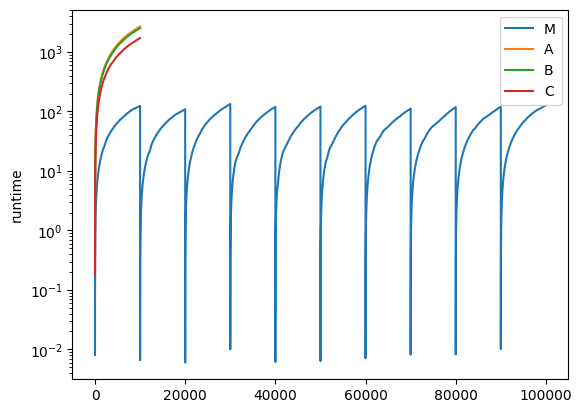

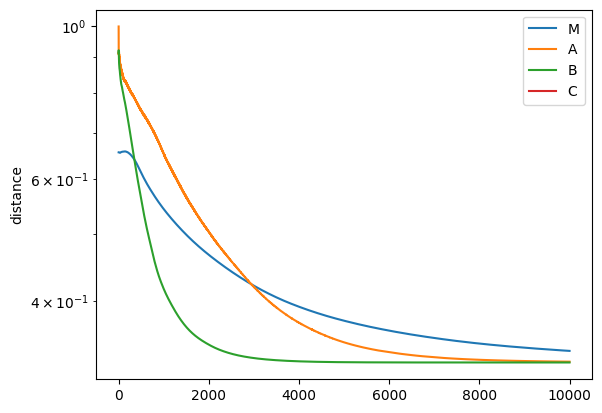

In [22]:
# #input ground truth

# algs={'M':1e-5,'A':1,'B':1,'C':1}
# keys=['Obj_list','runtime','distance']


# plt.figure()
# for key in keys:
#     for alg in algs:
#         #input A
        

#         output_folder = 'output/'+f'{size}/'+f'{max_iter}'
#         save_folder=os.path.join(output_folder,f'{alg}')
    
#         ep=algs[alg]
#         name=os.path.join(save_folder,f'{alg}_{key}_{ep}'+'.npy')
#         if os.path.exists(name):
#             key_value = np.load(name)
#         else:
#             print(f'{name} not exist')
#         plt.plot(key_value,label=f'{alg}')    


#     plt.ylabel(f'{key}')
#     plt.legend()
    
#     plt.yscale('log')
#     plt.show()

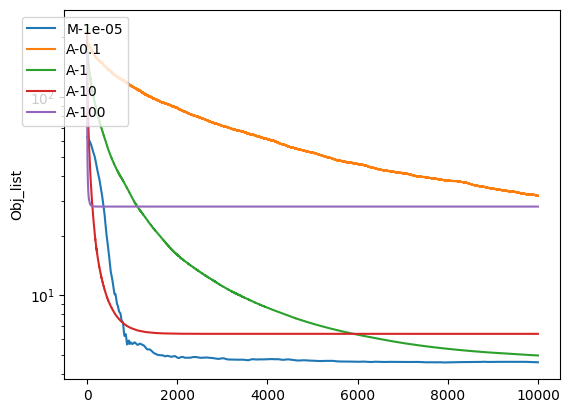

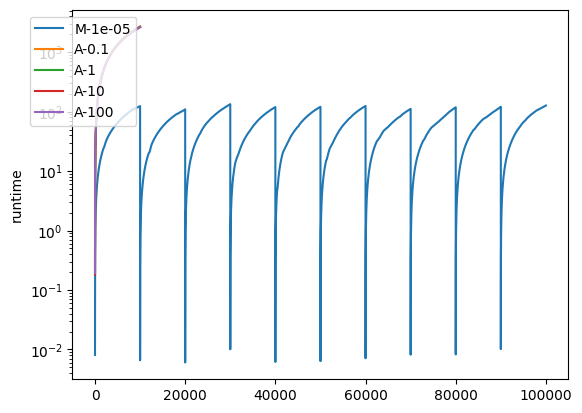

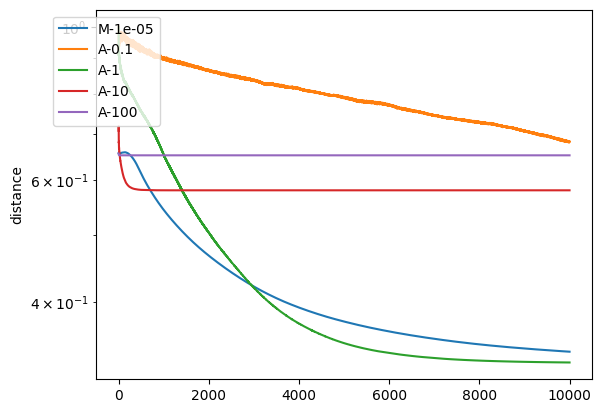

In [17]:
#input ground truth


algs={
    'M':[1e-5],
    'A':[10**i for i in range(-1,3)]}
keys=['Obj_list','runtime','distance']


plt.figure()
for key in keys:
    for alg in algs:
        #input A
        
        for ep in algs[alg]:

            output_folder = 'output/'+f'{size}/'+f'{max_iter}'
            save_folder=os.path.join(output_folder,f'{alg}')

            
            name=os.path.join(save_folder,f'{key}_{ep}'+'.npy')
            if os.path.exists(name):
                key_value = np.load(name)

            else:
                print(f'{name} not exist')
            plt.plot(key_value,label=f'{alg}-{ep}')    


    plt.ylabel(f'{key}')
    plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
    
    plt.yscale('log')
    plt.show()

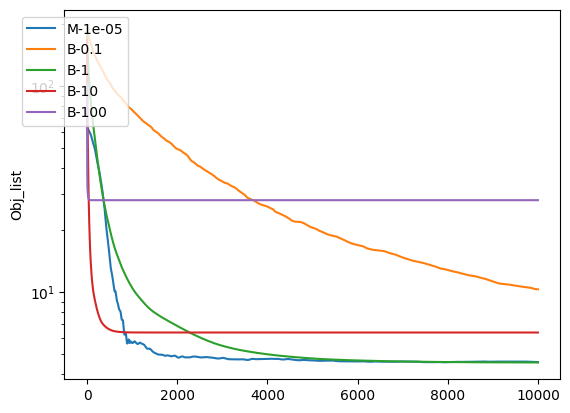

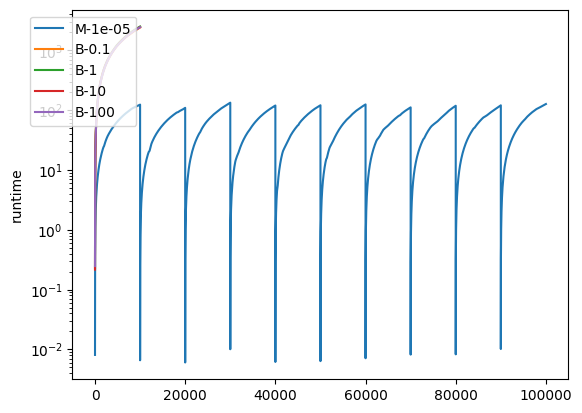

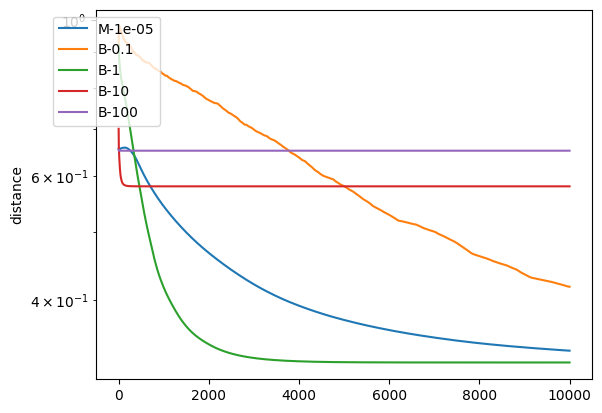

In [19]:
#input ground truth


algs={
    'M':[1e-5],
    'B':[10**i for i in range(-1,3)]}
keys=['Obj_list','runtime','distance']


plt.figure()
for key in keys:
    for alg in algs:
        #input A
        
        for ep in algs[alg]:

            output_folder = 'output/'+f'{size}/'+f'{max_iter}'
            save_folder=os.path.join(output_folder,f'{alg}')

            
            name=os.path.join(save_folder,f'{key}_{ep}'+'.npy')
            if os.path.exists(name):
                key_value = np.load(name)

            else:
                print(f'{name} not exist')
            plt.plot(key_value,label=f'{alg}-{ep}')    


    plt.ylabel(f'{key}')
    plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
    
    plt.yscale('log')
    plt.show()

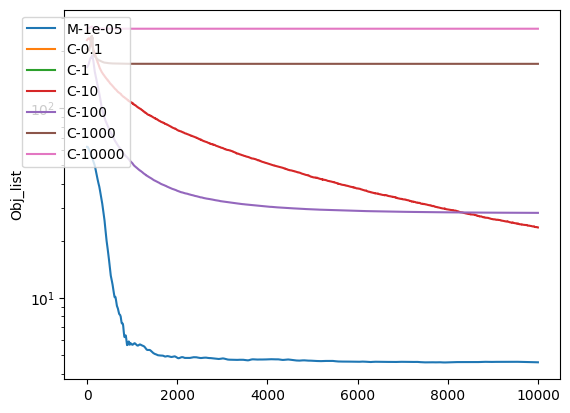

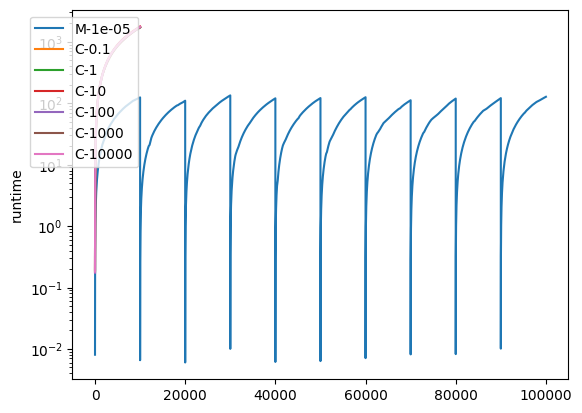

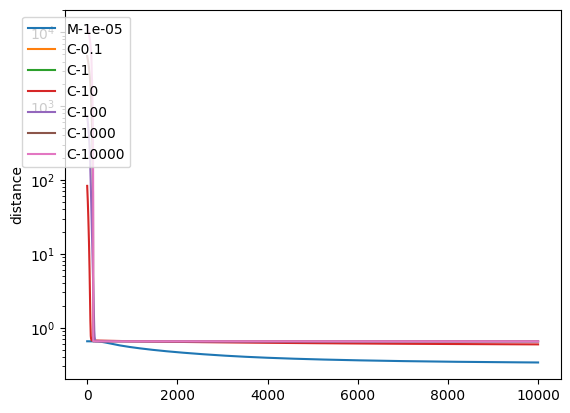

In [20]:
#input ground truth


algs={
    'M':[1e-5],
    'C':[10**i for i in range(-1,5)]}
keys=['Obj_list','runtime','distance']


plt.figure()
for key in keys:
    for alg in algs:
        #input A
        
        for ep in algs[alg]:

            output_folder = 'output/'+f'{size}/'+f'{max_iter}'
            save_folder=os.path.join(output_folder,f'{alg}')

            
            name=os.path.join(save_folder,f'{key}_{ep}'+'.npy')
            if os.path.exists(name):
                key_value = np.load(name)

            else:
                print(f'{name} not exist')
            plt.plot(key_value,label=f'{alg}-{ep}')    


    plt.ylabel(f'{key}')
    plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
    
    plt.yscale('log')
    plt.show()

In [15]:
algs = {'C':[10**i for i in range(-9,10) ]}
keys=['Obj_list','runtime','distance']
for key in keys:
    for alg in algs:
        #input A
        
        for ep in algs[alg]:

            output_folder = 'output/'+f'{size}/'+f'{max_iter}'
            save_folder=os.path.join(output_folder,f'{alg}')

            
            name=os.path.join(save_folder,f'{alg}_{key}_{ep}'+'.npy')
            if os.path.exists(name):
                os.rename(name,os.path.join(save_folder,f'{key}_{ep}'+'.npy') )

            else:
                print(f'{name} not exist')

output/40/10000/C/C_Obj_list_1e-09.npy not exist
output/40/10000/C/C_Obj_list_1e-08.npy not exist
output/40/10000/C/C_Obj_list_1e-07.npy not exist
output/40/10000/C/C_Obj_list_1e-06.npy not exist
output/40/10000/C/C_Obj_list_1e-05.npy not exist
output/40/10000/C/C_Obj_list_0.0001.npy not exist
output/40/10000/C/C_Obj_list_0.001.npy not exist
output/40/10000/C/C_Obj_list_0.01.npy not exist
output/40/10000/C/C_Obj_list_100000.npy not exist
output/40/10000/C/C_Obj_list_1000000.npy not exist
output/40/10000/C/C_Obj_list_10000000.npy not exist
output/40/10000/C/C_Obj_list_100000000.npy not exist
output/40/10000/C/C_Obj_list_1000000000.npy not exist
output/40/10000/C/C_runtime_1e-09.npy not exist
output/40/10000/C/C_runtime_1e-08.npy not exist
output/40/10000/C/C_runtime_1e-07.npy not exist
output/40/10000/C/C_runtime_1e-06.npy not exist
output/40/10000/C/C_runtime_1e-05.npy not exist
output/40/10000/C/C_runtime_0.0001.npy not exist
output/40/10000/C/C_runtime_0.001.npy not exist
output/40/1